In [1]:
from __future__ import division
import numpy as np

def predict(pos, variance, movement, movement_variance):
    return (pos + movement, variance + movement_variance)
    
def update(mean, variance, measurement, measurement_variance):
    return multiply(mean, variance, measurement, measurement_variance)
    
def multiply(mu1, var1, mu2, var2):
    mean = (var1*mu2 + var2*mu1) / (var1+var2)
    variance = 1 / (1/var1 + 1/var2)
    return (mean, variance)

In [2]:

pos= predict(2,2,0,8)
newPos = update(pos[0],pos[1],4,1)
print(newPos[0],newPos[1])
pos= predict(newPos[0],2,0,newPos[1])
newPos = update(pos[0],pos[1],2,1)
print(newPos[0],newPos[1])
pos= predict(newPos[0],2,0,newPos[1])
newPos = update(pos[0],pos[1],1.8,1)
print(newPos[0],newPos[1])
pos= predict(newPos[0],2,0,newPos[1])
newPos = update(pos[0],pos[1],2.1,1)
print(newPos[0],newPos[1])
pos= predict(newPos[0],2,0,newPos[1])
newPos = update(pos[0],pos[1],1.9,1)
print(newPos[0],newPos[1])



3.8181818181818183 0.9090909090909091
2.4651162790697674 0.7441860465116279
1.977639751552795 0.7329192546583851
2.0672212978369386 0.7321131447587355
1.9448060633080695 0.7320552831029871


In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import YouTubeVideo
from scipy.stats import norm

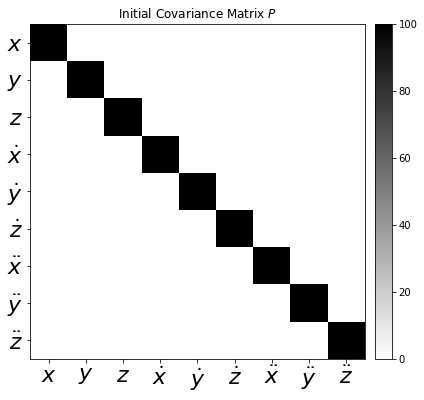

In [4]:
P = 100.0*np.eye(9)

fig = plt.figure(figsize=(6, 6))
im = plt.imshow(P, interpolation="none", cmap=plt.get_cmap('binary'))
plt.title('Initial Covariance Matrix $P$')
ylocs, ylabels = plt.yticks()
# set the locations of the yticks
plt.yticks(np.arange(10))
# set the locations and labels of the yticks
plt.yticks(np.arange(9),('$x$', '$y$', '$z$', '$\dot x$', '$\dot y$', '$\dot z$', '$\ddot x$', '$\ddot y$', '$\ddot z$'), fontsize=22)

xlocs, xlabels = plt.xticks()
# set the locations of the yticks
plt.xticks(np.arange(7))
# set the locations and labels of the yticks
plt.xticks(np.arange(9),('$x$', '$y$', '$z$', '$\dot x$', '$\dot y$', '$\dot z$', '$\ddot x$', '$\ddot y$', '$\ddot z$'), fontsize=22)

plt.xlim([-0.5,8.5])
plt.ylim([8.5, -0.5])

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax)


plt.tight_layout()

In [5]:
dt = 0.01 # Time Step between Filter Steps

A = np.matrix([[1.0, 0.0, 0.0, dt, 0.0, 0.0, 1/2.0*dt**2, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0,  dt, 0.0, 0.0, 1/2.0*dt**2, 0.0],
              [0.0, 0.0, 1.0, 0.0, 0.0,  dt, 0.0, 0.0, 1/2.0*dt**2],
              [0.0, 0.0, 0.0, 1.0, 0.0, 0.0,  dt, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,  dt, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,  dt],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])
print(A.shape)

(9, 9)


In [6]:
H = np.matrix([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
               [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
print(H, H.shape)

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]] (3, 9)


In [7]:
import numpy as np
p = np.loadtxt('pose.txt', usecols=range(4))
print(p)
c = np.loadtxt('controls.txt', usecols=range(4))
print(c)
g = np.loadtxt('ground_truth.txt', usecols=range(7))
print(g)


[[ 0.00000000e+00  1.11392416e+02 -5.09096788e+01  3.43638270e+02]
 [ 1.00000000e-01  1.57561404e+02 -4.73522147e+02  5.65784851e+01]
 [ 2.00000000e-01  1.16059722e+02  5.65945628e+01 -2.40580802e+02]
 ...
 [ 3.98000000e+01  7.53887145e+03  1.59142857e+03  7.80044528e+03]
 [ 3.99000000e+01  7.74666531e+03  1.32535484e+03  8.43669019e+03]
 [ 4.00000000e+01  7.69088664e+03  1.82063668e+03  8.37469044e+03]]
[[  0.         -16.77086473  19.52854026  -0.59219398]
 [  0.1         -7.67969253   9.28316786  -7.68394386]
 [  0.2        -11.05717253  -4.66323384  -9.91079945]
 ...
 [ 39.8          7.74875951 -26.33808599  12.37139255]
 [ 39.9         10.82955287 -14.46837719  11.86654492]
 [ 40.          20.0152667  -40.61343999  23.34736045]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.00000000e-01 -8.38543200e-02  9.76427000e-02 ... -1.67708647e+00
   1.95285403e+00 -5.92194000e-02]
 [ 2.00000000e-01 -2.89961430e-01  3.39343940e

In [8]:
def column(matrix, i):
    return [row[i] for row in matrix]

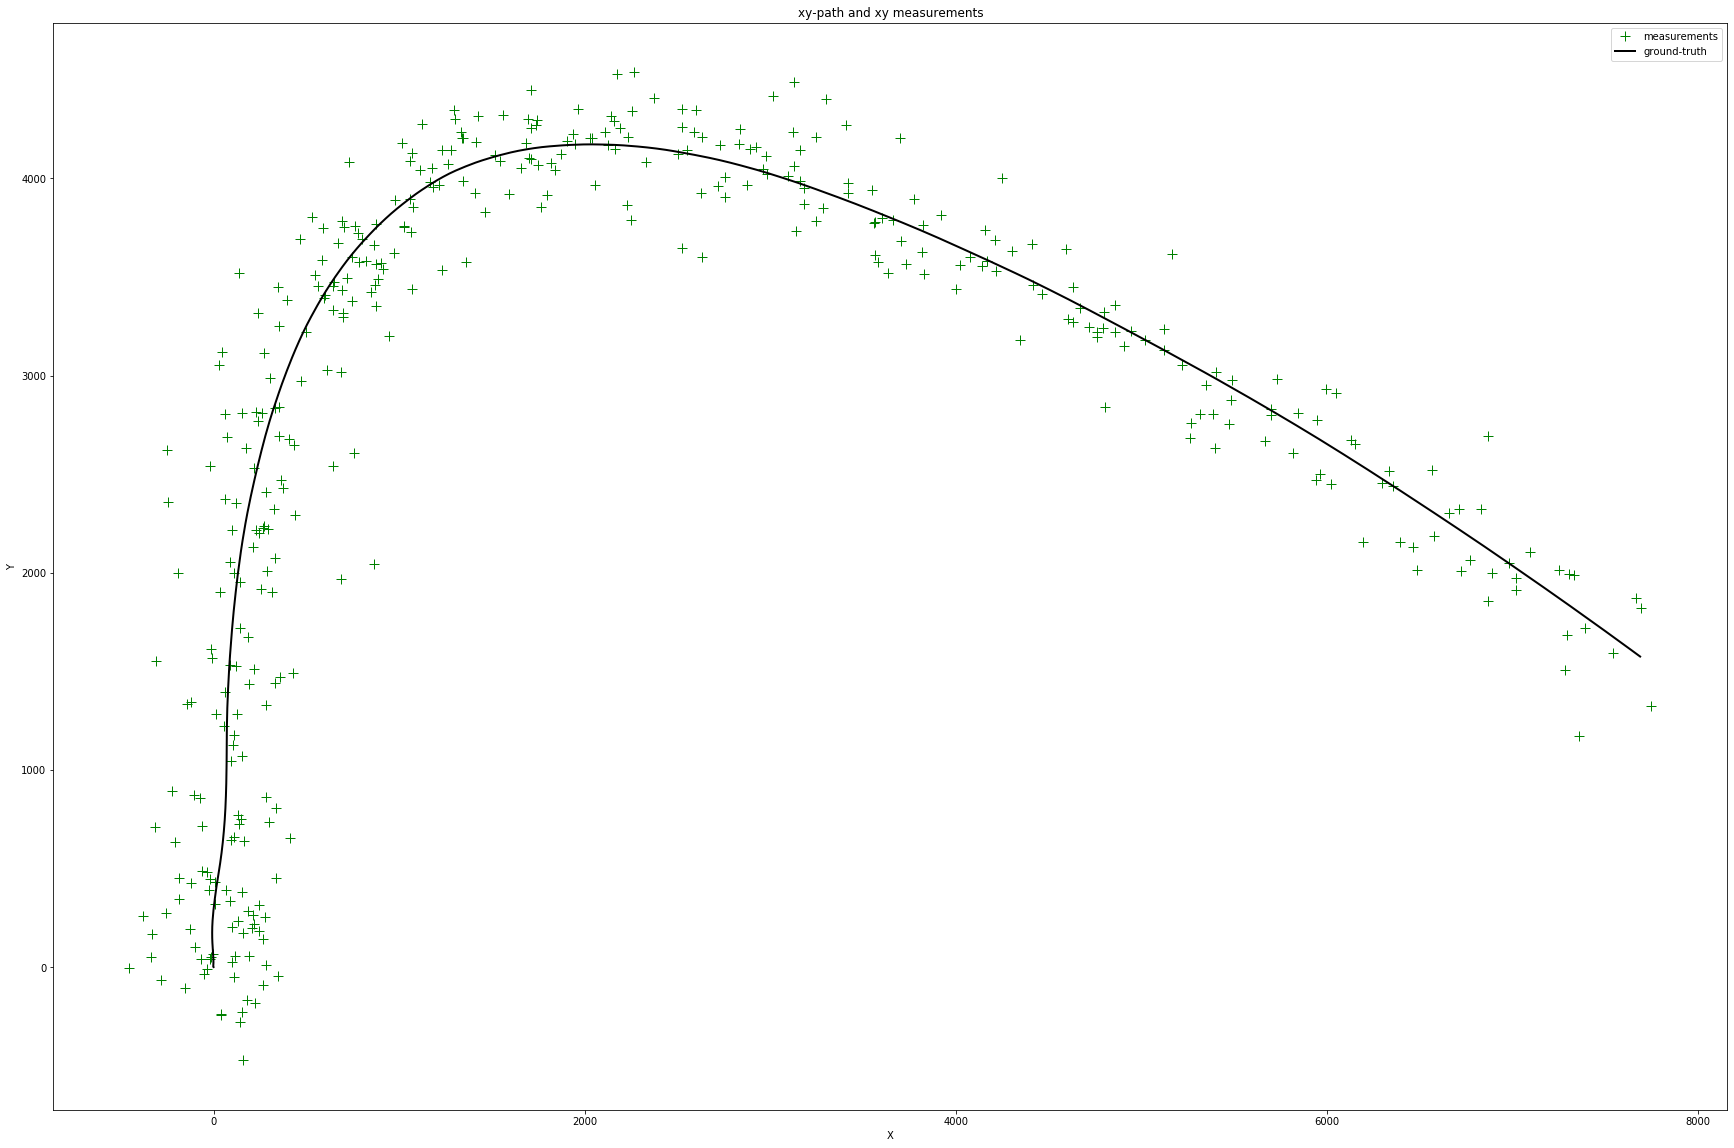

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.DataFrame({'x':column (p, 1),'measurements':column(p, 2),'xr':column(g, 1),'ground-truth':column(g, 2)})
plt.figure(figsize=(30,20))
plt.plot( 'x', 'measurements', data=df, marker='+',markerfacecolor='None',linestyle = 'None', markersize=10, color='green')
plt.plot( 'xr', 'ground-truth', data=df, marker='', color='black', markersize=2, linewidth=2)
plt.title('xy-path and xy measurements')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.rc('font', size=26)


plt.show()

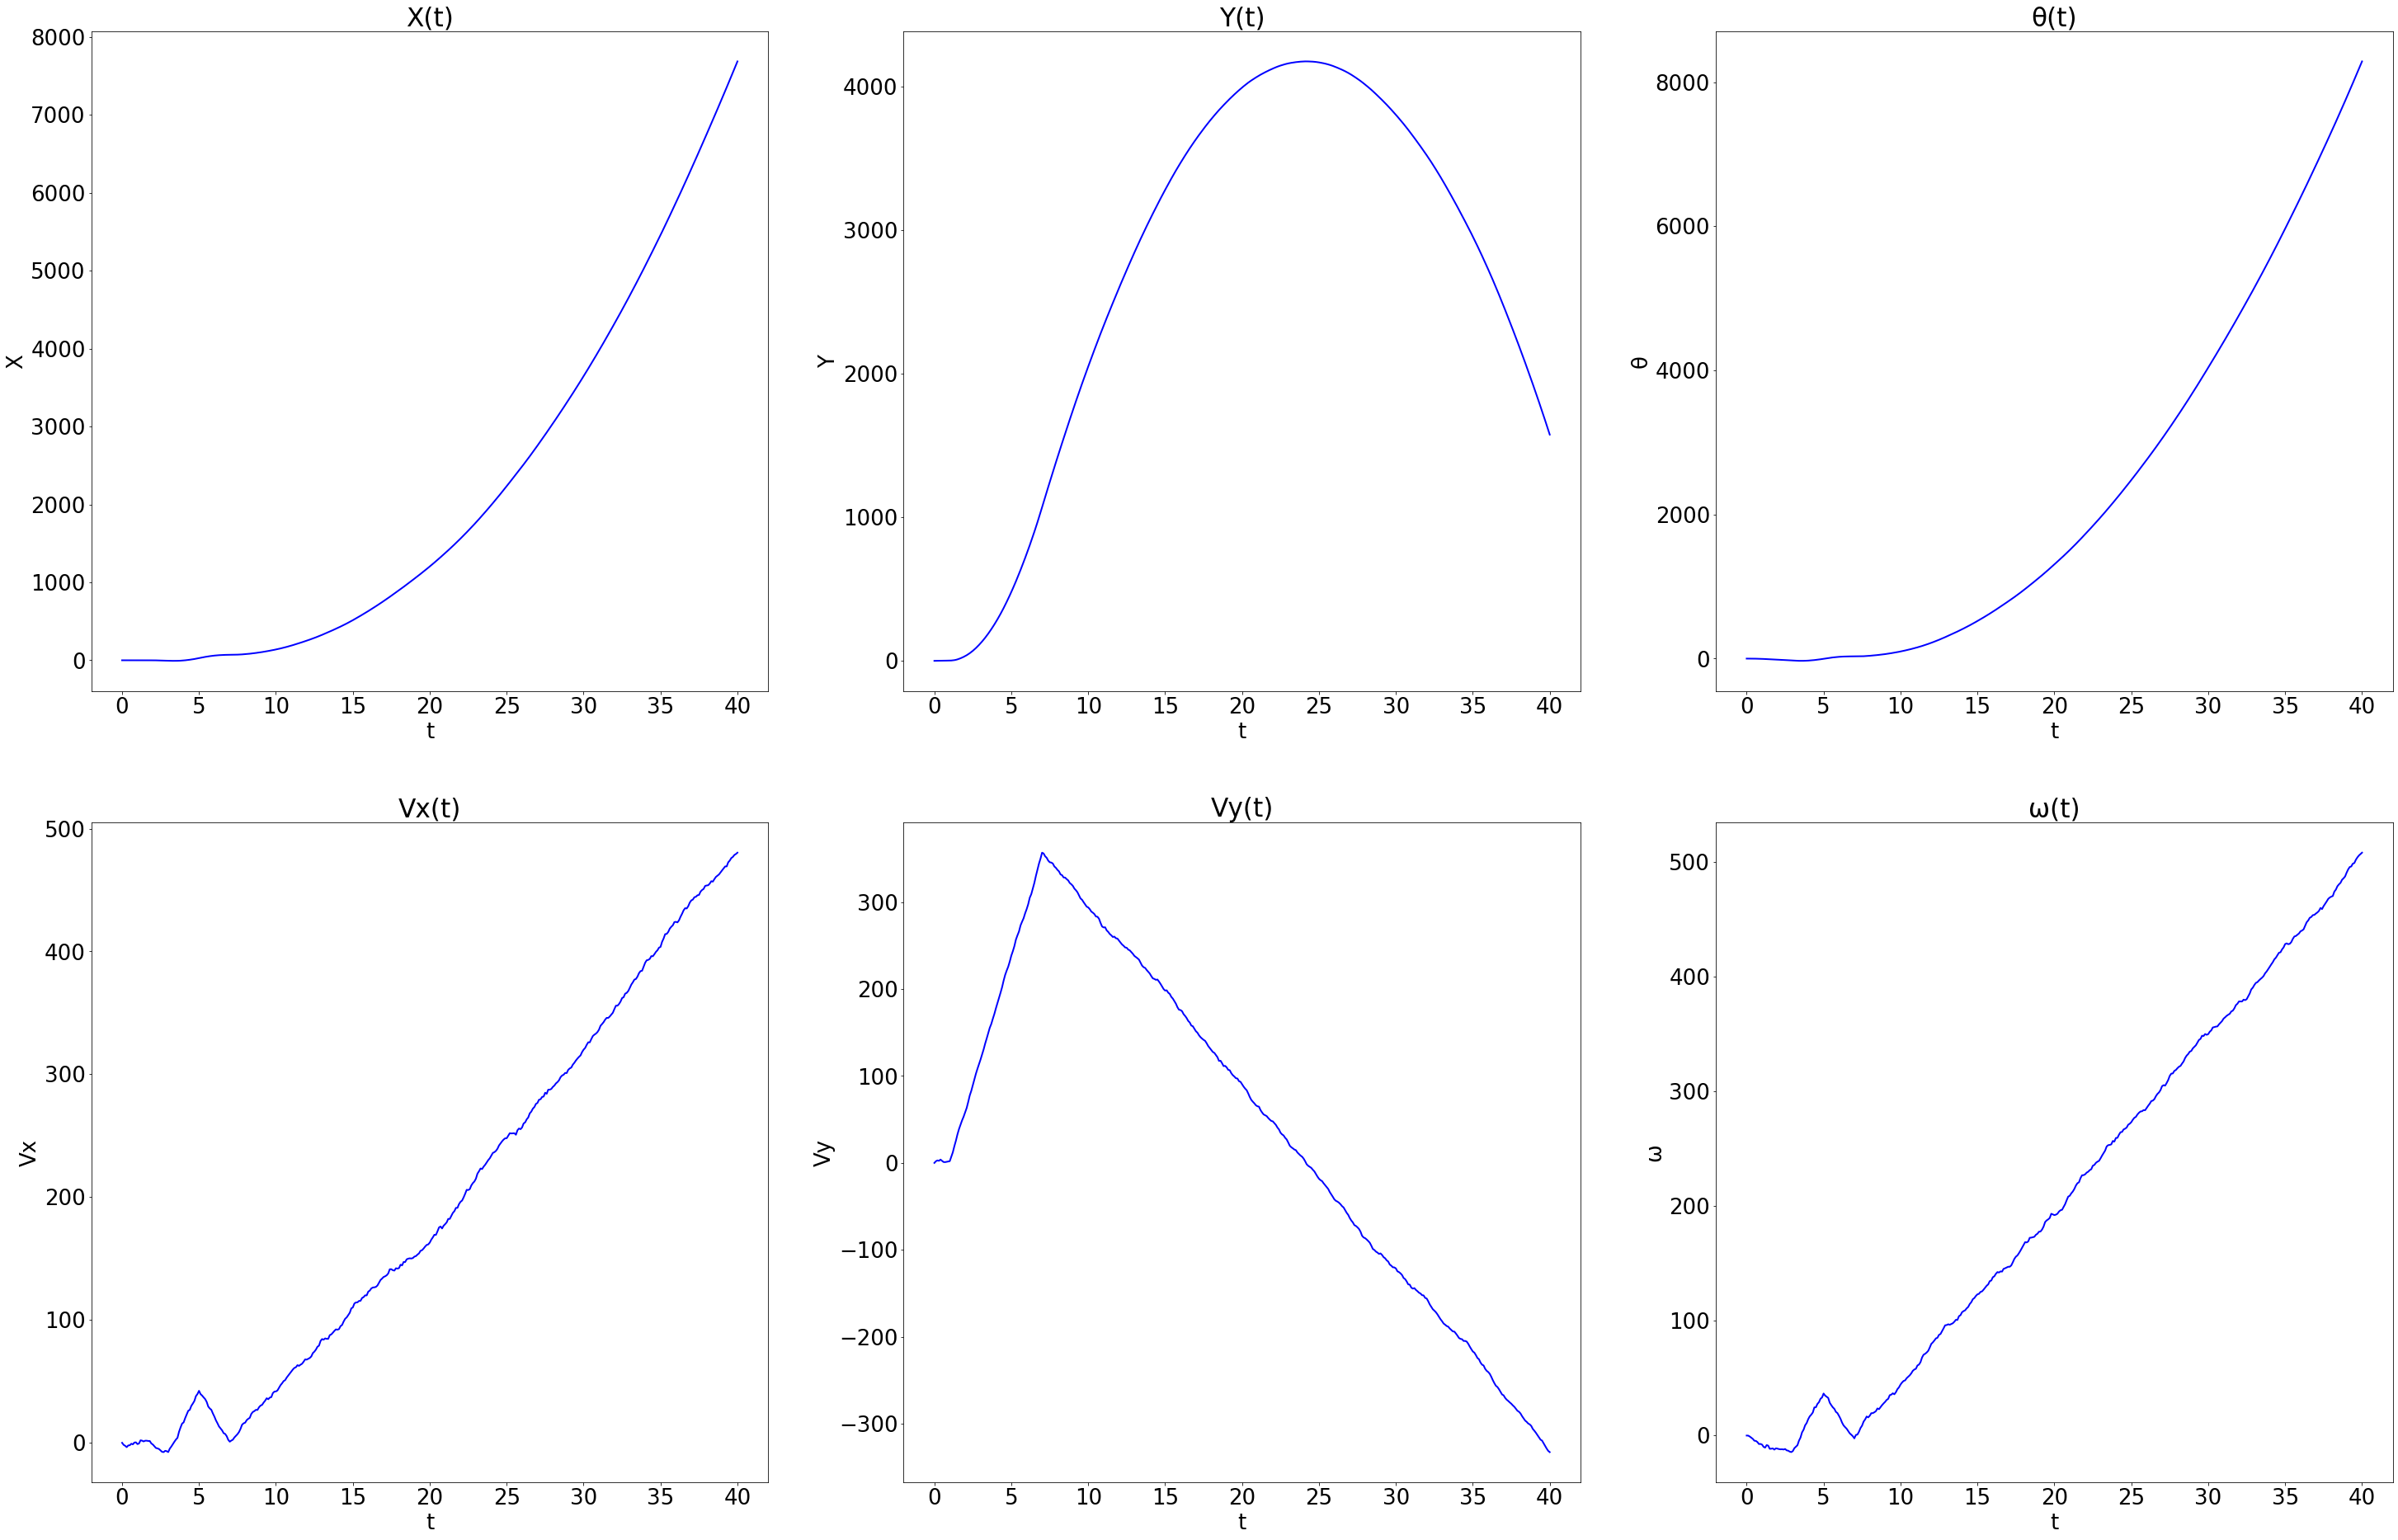

In [10]:
plt.figure(figsize=(50,50))
paramsName = {'1':"X", '2':"Y", '3':'\u03B8', '4':"Vx", '5':"Vy", '6':'\u03C9'}
for i in range(1, 7):
    plt.subplot(3, 3, i)
    plt.plot( 't', 'ground', data={'t':column (g, 0), 'ground':column(g, 0+i)}, marker='', color='blue', markersize=2, linewidth=2, label=paramsName[str(i)])
    plt.xlabel('t')
    plt.title(paramsName[str(i)]+'(t)')
    plt.ylabel(paramsName[str(i)])
    plt.rc('font', size=26)

plt.show() 


In [11]:
print('\u03C9')

ω
